In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score



In [2]:
! ls ../input

sample_submission.csv  test.csv  train.csv


In [3]:
Submission = pd.read_csv('../input/sample_submission.csv')

In [4]:
test = pd.read_csv('../input/test.csv')

In [5]:
train = pd.read_csv('../input/train.csv')

In [6]:
# Correlation matrix
corrmat = train.corr()
corrmat

,product_number,department,category,creditCard,customer,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,total,target
product_number,1.000000,-0.247604,-0.585016,-0.227674,-0.036352,-0.032045,0.122607,-0.097057,0.013838,-0.173891,-0.071697,-0.005054,0.107391,0.037159,-0.022551
department,-0.247604,1.000000,0.374351,-0.103567,-0.040559,0.028945,0.001427,-0.030812,0.034707,0.302680,0.098828,0.125508,-0.166982,-0.046229,-0.006794
category,-0.585016,0.374351,1.000000,0.282084,0.113972,0.030965,0.029558,-0.097295,0.004041,0.117886,0.149066,0.037291,-0.077608,0.045133,-0.003497
creditCard,-0.227674,-0.103567,0.282084,1.000000,0.170420,0.007885,-0.063388,0.034335,-0.063585,-0.056972,0.010197,-0.106041,-0.009695,-0.131318,0.040518
customer,-0.036352,-0.040559,0.113972,0.170420,1.000000,0.000010,0.003528,0.013632,0.008873,-0.057497,-0.003624,0.027874,0.025740,0.031693,0.006359
var_32,-0.032045,0.028945,0.030965,0.007885,0.000010,1.000000,0.021019,0.024827,0.219666,0.005486,0.048780,0.064465,-0.000094,-0.029975,-0.002069
var_33,0.122607,0.001427,0.029558,-0.063388,0.003528,0.021019,1.000000,-0.326142,-0.007465,-0.009851,0.091636,0.050657,0.003190,-0.013432,-0.056737
var_34,-0.097057,-0.030812,-0.097295,0.034335,0.013632,0.024827,-0.326142,1.000000,-0.001582,0.076786,-0.059319,-0.041182,-0.082281,0.075361,0.085369
var_35,0.013838,0.034707,0.004041,-0.063585,0.008873,0.219666,-0.007465,-0.001582,1.000000,-0.218964,-0.141157,0.106504,0.538441,0.234912,-0.038370
var_36,-0.173891,0.302680,0.117886,-0.056972,-0.057497,0.005486,-0.009851,0.076786,-0.218964,1.000000,0.104380,0.078275,-0.596027,-0.053135,0.013483


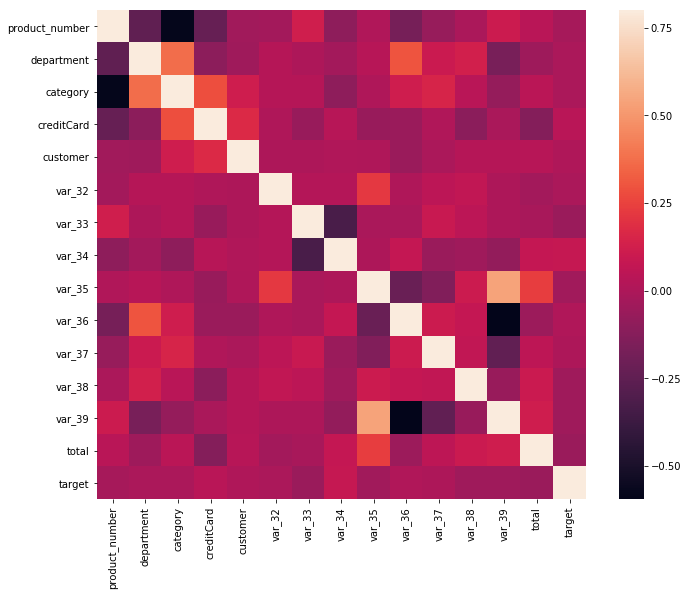

In [7]:
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [8]:
train.head()

,id,product_number,department,category,creditCard,customer,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,total,target
0,id_11149922,5072,1852,25,6447,928147,0.725899,3,2,115,0,44,62,12,1.399162,0
1,id_15609305,4751,2212,6,1813,928147,-1.023377,3,2,215,0,2,110,39,0.286388,0
2,id_5222335,5817,528,2,6447,928147,-0.517814,3,2,55,0,2,0,20,-0.335599,0
3,id_1884252,3088,3682,24,6447,928147,-0.395321,3,2,6,2,4,110,6,-1.516403,0
4,id_12069677,2158,2204,24,6447,928147,0.610663,3,2,62,3,11,59,5,0.908375,0


In [9]:
train.var_33.unique()

array([3, 2, 1, 5, 6, 0, 4, 7])

In [10]:
train.var_33.value_counts()

3    10320527
2      519118
1       99648
5       23255
0         907
4         547
7         345
6         255
Name: var_33, dtype: int64

In [11]:
test.describe()

,product_number,department,category,creditCard,customer,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,total
count,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06,5.220160e+06
mean,4.058756e+03,1.998115e+03,1.093411e+01,5.701060e+03,8.902795e+05,-2.797815e-03,2.909431e+00,2.139839e+00,1.370623e+02,1.445858e+00,1.177291e+01,4.270875e+01,1.864411e+01,-6.589159e-02
std,1.471863e+03,1.067493e+03,9.266319e+00,1.567957e+03,1.861433e+05,9.939574e-01,3.319442e-01,5.558938e-01,9.270542e+01,1.307717e+00,1.534135e+01,4.893939e+01,1.583848e+01,9.865463e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.617979e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.144876e+01
25%,3.088000e+03,1.258000e+03,4.000000e+00,6.183000e+03,9.281470e+05,-9.388662e-01,3.000000e+00,2.000000e+00,6.200000e+01,0.000000e+00,2.000000e+00,0.000000e+00,5.000000e+00,-3.355989e-01
50%,4.751000e+03,2.212000e+03,6.000000e+00,6.447000e+03,9.281470e+05,-9.538380e-02,3.000000e+00,2.000000e+00,1.160000e+02,2.000000e+00,4.000000e+00,1.400000e+01,1.400000e+01,2.151189e-01
75%,4.751000e+03,2.269000e+03,2.400000e+01,6.447000e+03,9.281470e+05,8.974464e-01,3.000000e+00,2.000000e+00,2.110000e+02,3.000000e+00,1.100000e+01,6.500000e+01,2.000000e+01,2.863883e-01
max,6.127000e+03,4.193000e+03,2.500000e+01,6.990000e+03,1.401927e+06,1.655276e+00,7.000000e+00,8.000000e+00,3.700000e+02,3.000000e+00,6.200000e+01,1.710000e+02,5.100000e+01,3.938133e+00


In [12]:
#random forest, extratrees
#linear regression : lasso , ridge
#decision tree 
#svm
#neural net
#k nearest neighbours
#gradient boosted treesa

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
train.columns

Index(['id', 'product_number', 'department', 'category', 'creditCard',
       'customer', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'total', 'target'],
      dtype='object')

In [15]:
cols= [ 'product_number', 'department', 'category', 'creditCard',
       'customer', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'total']

In [16]:
X_train, X_validation, y_train, y_validation = train_test_split(train.drop('target',axis=1), train.target, test_size=0.2, random_state=42)

In [17]:
RF = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                            oob_score=False, n_jobs=4, random_state=None, verbose=True, warm_start=False, class_weight=None)

In [18]:
RF.fit(X_train[cols], y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 33.6min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 34.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [19]:
RF.predict_proba(X_validation[cols])[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   20.6s finished


array([0.08103994, 0.03497898, 0.01604908, ..., 0.06179358, 0.06157992,
       0.05909368])

In [20]:
random_forest_predictions = RF.predict_proba(X_validation[cols])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   20.6s finished


In [21]:
random_forest_predictions

array([[0.91896006, 0.08103994],
       [0.96502102, 0.03497898],
       [0.98395092, 0.01604908],
       ...,
       [0.93820642, 0.06179358],
       [0.93842008, 0.06157992],
       [0.94090632, 0.05909368]])

In [22]:
val_preds = random_forest_predictions[:,1]

In [23]:
roc_auc_score(y_validation,val_preds)

0.6792816475299467

In [24]:
#Predict test
test_pred = RF.predict_proba(test.drop('id',axis=1))[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   55.3s finished


In [25]:
Submission['target'] = test_pred

In [26]:
Submission.to_csv('submission1.csv',index=False)